In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imbalanced

1. Let's observe how linear models work in case of data imbalanced
2. Observe how hyper plane changes according to change in your learning rate.
3. Below we have created 4 random datasets which are linearly separable and having class imbalance
4. In the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80

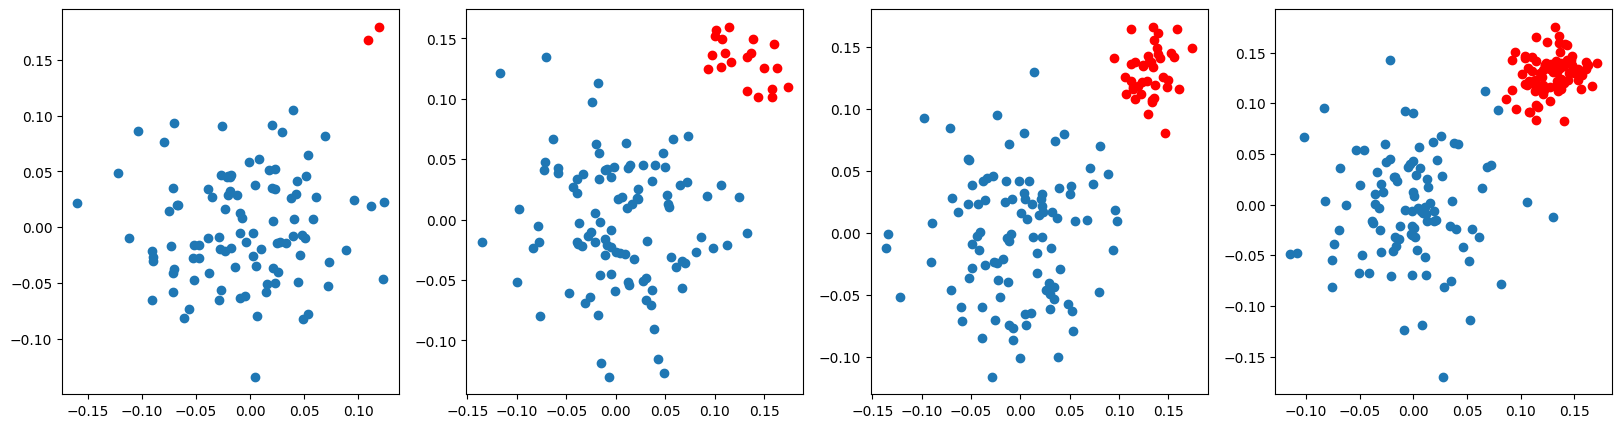

In [3]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

## Applying SVM

1. We will create a grid of plots like this
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] we will be drawing the hyper plane that we get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

We will represent the support vectors in different colors, 
which will help us understand the position of hyper plane 

In [4]:
def svm(X, y, C):
    plt.figure(figsize=(20,3))
    for i, c in enumerate(C):
        clf = SVC(C=c, kernel="linear")
        clf.fit(X, y)

        plt.subplot(1, 4, i+1)
        plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=30, cmap=plt.cm.Paired)

        # plot the decision function
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = clf.decision_function(xy).reshape(XX.shape)

        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors=['c', 'k', 'r'], levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
        # plot support vectors
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                   linewidth=1, facecolors='none', edgecolors='k')
        plt.legend([ax.collections, ax.collections, ax.collections], ["-ve", "Decision Boundary", "+ve"])
        title = "Regularization : "+str(c)
        plt.title(title)
    
    plt.show()

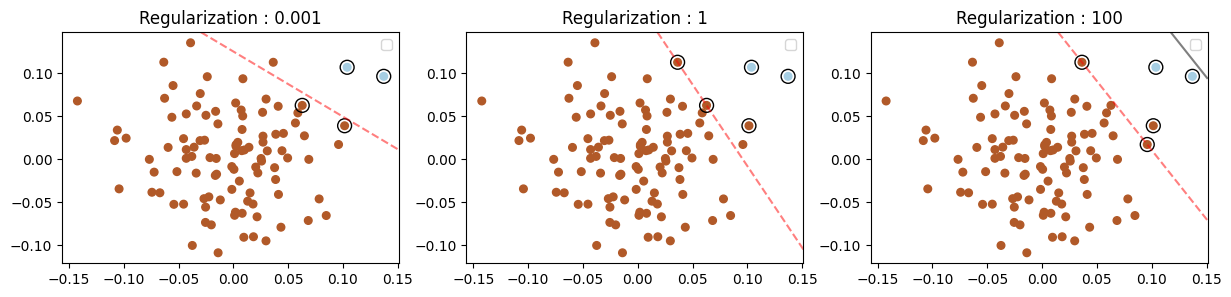

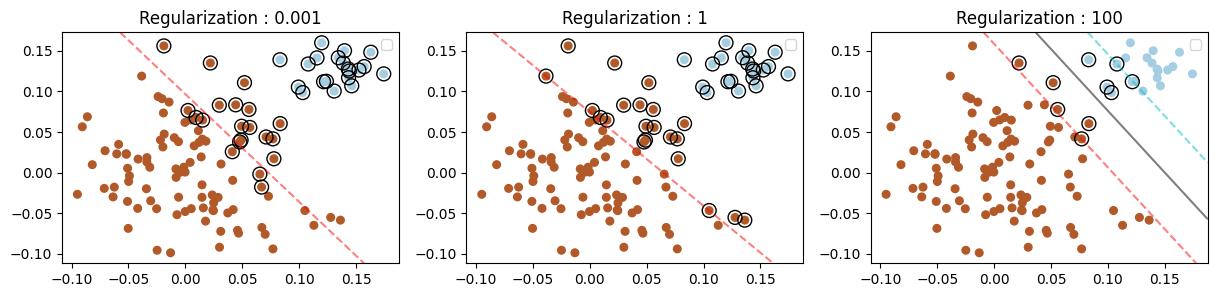

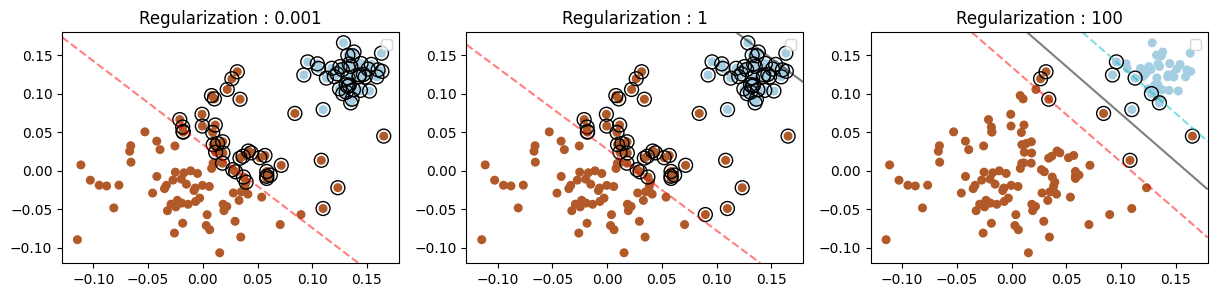

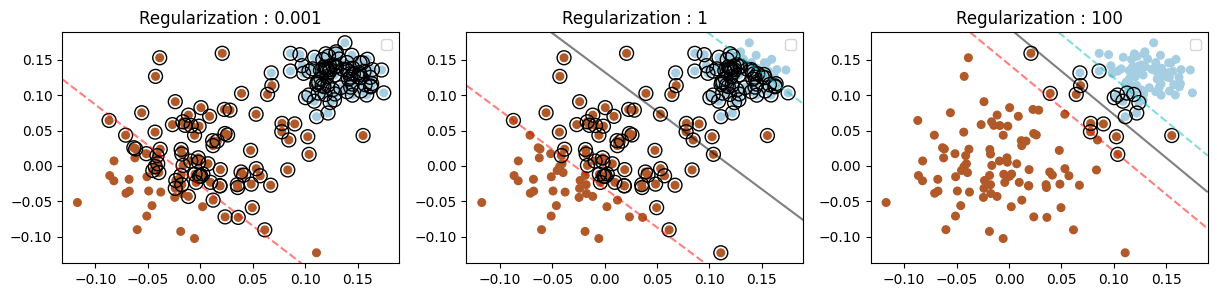

In [5]:
# here we are creating different regularization values
regularization = [0.001, 1, 100]

# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]

for j,i in enumerate(ratios):
    X_p = np.random.normal(0,0.05,size=(i[0],2))
    X_n = np.random.normal(0.13,0.02,size=(i[1],2))
    y_p = np.array([1]*i[0]).reshape(-1,1)
    y_n = np.array([0]*i[1]).reshape(-1,1)
    X = np.vstack((X_p,X_n))
    y = np.vstack((y_p,y_n))
    svm(X, y, regularization)

## Observations:
1. For very highly imbalanced data, SVM model fails to find support vectors for less dominating class, and as we increase regularization term, it starts finding support vectors for less dominating class and hyperplane with some misclassified points.

2. As we add more balance to data and increase regularization term, SVM easily finds support vectors and margin maximization hyperplane and starts moving towards more generalized model.

## Applying LR

 We will do the same thing what we have done above, except instead of SVM we will apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

In [6]:
def lr(X, y, C):
    plt.figure(figsize=(20,3))
    for i, r in enumerate(C):
        lr = LogisticRegression(C=r)
        lr.fit(X, y)

        plt.subplot(1, 4, i+1)

        # Coefficient of the features in the decision function. (from theta 1 to theta n)
        parameters = lr.coef_[0]
        # Intercept (a.k.a. bias) added to the decision function. (theta 0)
        parameter0 = lr.intercept_

        # Plotting the decision boundary
        #fig = plt.figure(figsize=(10,7))
        x_values = [np.min(X[:, 0]  ), np.max(X[:, 1])]
        
        # calculate y values
        y_values = np.dot((-1./parameters[1]), (np.dot(parameters[0],x_values) + parameter0))
        colors=['red' if l==0 else 'blue' for l in y]
        plt.scatter(X[:, 0], X[:, 1], label='Logistics regression', color=colors)
        plt.plot(x_values, y_values, label='Decision Boundary')

        title = "Regularization : "+str(r)
        plt.title(title)
    
    plt.show()

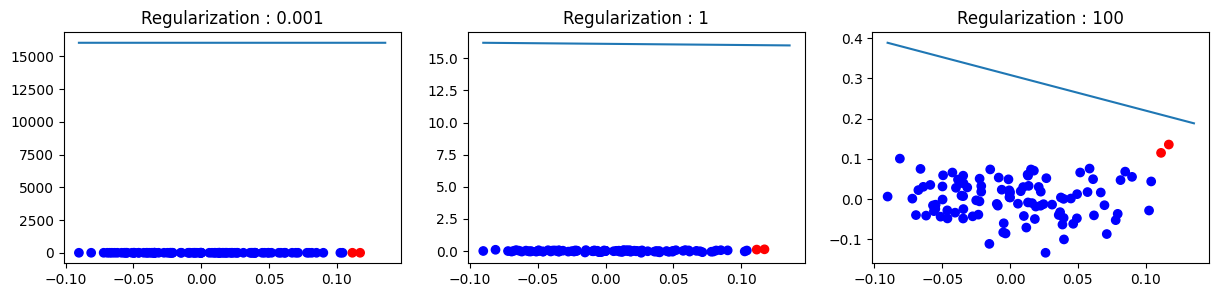

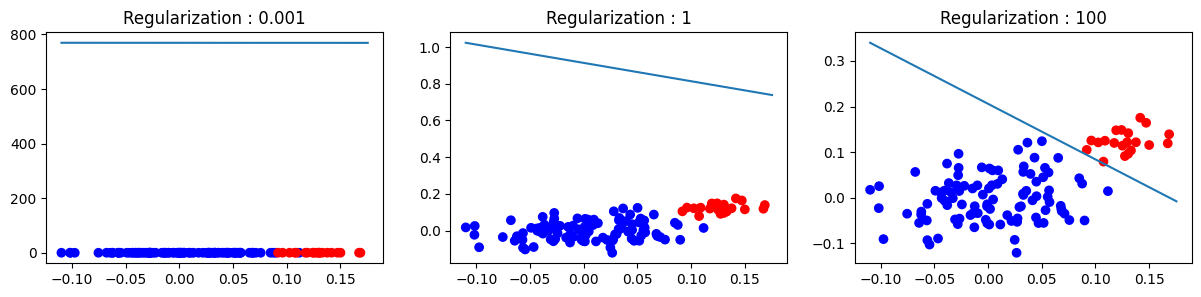

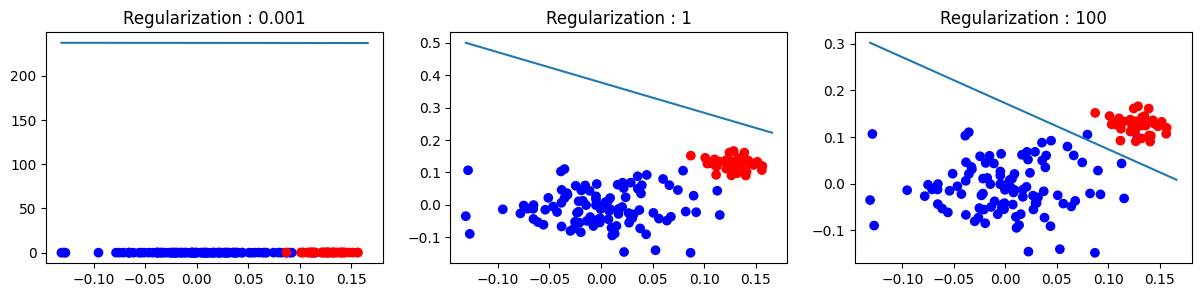

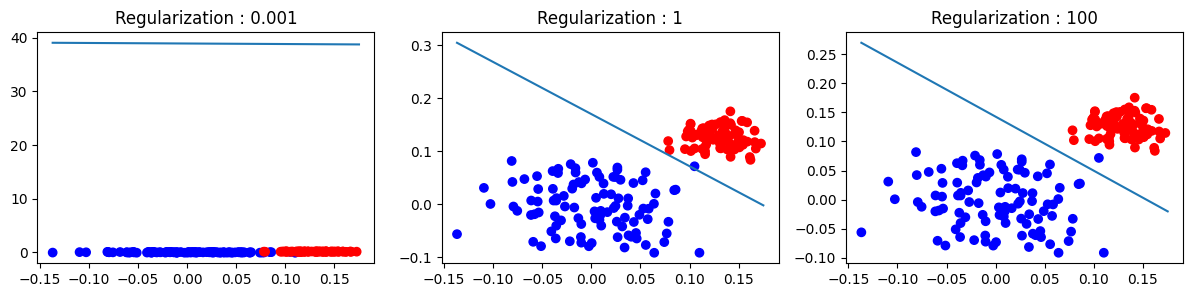

In [7]:
# here we are creating different regularization values
regularization = [0.001, 1, 100]

# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]

for j,i in enumerate(ratios):
    X_p = np.random.normal(0,0.05,size=(i[0],2))
    X_n = np.random.normal(0.13,0.02,size=(i[1],2))
    y_p = np.array([1]*i[0]).reshape(-1,1)
    y_n = np.array([0]*i[1]).reshape(-1,1)
    X = np.vstack((X_p,X_n))
    y = np.vstack((y_p,y_n))
    lr(X, y, regularization)

## Observations:
1. For very highly imbalanced data, Logistic Regression model fails to find hyperplane for less dominating class, and as we increase regularization term, it starts finding hyperplane for less dominating class with some misclassified points.

2. As we add more balance to data and increase regularization term, Logistic Regression easily finds hyperplane and starts moving towards more generalized model.

In both the models as we increase regularization, it starts converging and finds best fit to the data.